# Chapter 6 - Statistics and Linear Regressions

In this chapter we will learn to run some summary statistics and run a simple linear regression. There are many ways to run a linear regression in Python, but the package we'll be focusing on it **statsmodel**. 

***

Let's start by importing the pertinent libraries.

In [1]:
#import standard libraries
import numpy as np
import pandas as pd
import math
import glob
from datetime import datetime
import warnings
warnings.simplefilter('ignore')

#import statistical libraries
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#import visualization libraries
import matplotlib.pyplot as plt

## Read in and Process Data

First we must read our data into Python. We'll be reading in the seabird breeding success datasheet and the El Niño-Southern Oscillation (ENSO) data. This is an index generated by the National Oceanographic and Atmospheric Administration (NOAA). The data is based on sea surface temperature anomalies using a 30-year period and represents a three month mean. Values can be access from the NOAA site and are updated monthly: https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

In [20]:
###Read in the seabird data
bird = pd.read_csv('/content/drive/MyDrive/data/seabird_bs_may23.csv', index_col = [0])

#select out your two bird species
penguin = bird[bird['sppsite'] == 'little penguin_Oamaru'][['year_recorded','site', 'lat', 'lon', 'spp', 'bs']]
shearwater = bird[bird['sppsite'] == 'sooty shearwater_Kauwahaia'][['year_recorded','site', 'lat', 'lon', 'spp', 'bs']]

#join the data together
bird_combined = penguin.merge(shearwater, on = 'year_recorded', how = 'outer', suffixes = ('_penguin', '_shearwater'))
bird_combined

,year_recorded,site_penguin,lat_penguin,lon_penguin,spp_penguin,bs_penguin,site_shearwater,lat_shearwater,lon_shearwater,spp_shearwater,bs_shearwater
0,1994,Oamaru,-45.110212,170.979431,little penguin,2.023256,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.676471
1,1995,Oamaru,-45.110212,170.979431,little penguin,1.983607,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.653061
2,1996,Oamaru,-45.110212,170.979431,little penguin,2.025641,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.319149
3,1997,Oamaru,-45.110212,170.979431,little penguin,1.867347,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.638889
4,1998,Oamaru,-45.110212,170.979431,little penguin,1.425743,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.222222
5,1999,Oamaru,-45.110212,170.979431,little penguin,1.288136,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.416667
6,2000,Oamaru,-45.110212,170.979431,little penguin,1.638095,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.589744
7,2001,Oamaru,-45.110212,170.979431,little penguin,1.627907,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.465116
8,2002,Oamaru,-45.110212,170.979431,little penguin,1.955556,Kauwahaia,-36.886544,174.437072,sooty shearwater,0.627907
9,2003,Oamaru,-45.110212,170.979431,little penguin,2.480000,NaN,NaN,NaN,NaN,NaN


In [7]:
###Read in the ENSO data
enso = pd.read_csv('/content/drive/MyDrive/data/ENSO_values.csv')

enso

,Year,Month,ENSO,Month_num,Date
0,1950,DJF,-1.5,1,1950-01-01
1,1950,JFM,-1.3,2,1950-02-01
2,1950,FMA,-1.2,3,1950-03-01
3,1950,MAM,-1.2,4,1950-04-01
4,1950,AMJ,-1.1,5,1950-05-01
...,...,...,...,...,...
883,2023,JAS,NaN,8,2023-08-01
884,2023,ASO,NaN,9,2023-09-01
885,2023,SON,NaN,10,2023-10-01
886,2023,OND,NaN,11,2023-11-01


In [21]:
###Join the data together
#select out the DJM ENSO
enso_DJM = enso.loc[enso['Month'] == 'DJF'].drop(['Month', 'Month_num', 'Date'], axis = 1)

#join the data based on year
bird_combined = bird_combined.merge(enso_DJM, how = 'outer', left_on = 'year_recorded', right_on = 'Year')

#select out the columns we want
bird_combined = bird_combined[['Year', 'bs_penguin', 'bs_shearwater', 'ENSO']]

#remove missing values based on years we don't have breeding success for
bird_combined = bird_combined.dropna(subset = ['bs_penguin', 'bs_shearwater'], how = 'all').sort_values('Year').reset_index(drop = True)
bird_combined

,Year,bs_penguin,bs_shearwater,ENSO
0,1993,NaN,0.605263,0.1
1,1994,2.023256,0.676471,0.1
2,1995,1.983607,0.653061,1.0
3,1996,2.025641,0.319149,-0.9
4,1997,1.867347,0.638889,-0.5
5,1998,1.425743,0.222222,2.2
6,1999,1.288136,0.416667,-1.5
7,2000,1.638095,0.589744,-1.7
8,2001,1.627907,0.465116,-0.7
9,2002,1.955556,0.627907,-0.1


## Explore the Data

### Summary Statistics

In addition to graphs and visualizing your data, it's also important to look at summary statistics to get a better understanding of it. The most basic summary statistics (mean, median, and mode) along with some other useful ones can easily be called on a **pandas** dataframe. The `agg()` function allows you to call multiple summary stats at once. 

In [22]:
#show the mean of each column
bird_combined.mean()

Year             2007.000000
bs_penguin          1.912802
bs_shearwater       0.518964
ENSO               -0.079310
dtype: float64

In [23]:
#how the mean and the standard deviation
bird_combined.agg(['mean', 'std'])

,Year,bs_penguin,bs_shearwater,ENSO
mean,2007.000000,1.912802,0.518964,-0.079310
std,8.514693,0.366884,0.147870,1.080469


In [25]:
#use the describe function to get lots of information about your data
bird_combined.describe().round(2)
#the .round() function is useful to round all numbers to a specified decimal which cleans up the output

,Year,bs_penguin,bs_shearwater,ENSO
count,29.00,28.00,27.00,29.00
mean,2007.00,1.91,0.52,-0.08
std,8.51,0.37,0.15,1.08
min,1993.00,1.29,0.22,-1.70
25%,2000.00,1.61,0.39,-0.90
50%,2007.00,1.94,0.55,-0.30
75%,2014.00,2.15,0.63,0.60
max,2021.00,2.68,0.79,2.50


### Outlier Detection

Sometimes the data contains outliers, data that falls well outside the rest of the data. Outliers can be useful in helping detect "bad" observations, though sometimes outliers are legitimate observations. The choice to include or remove outliers from the data is ultimately up to you. Still though it is useful to identify outliers to either be removed or further investigated. 

One method for outlier detection is to calculate percentiles, a score below which a given percentage falls. Looking at the high and low percentiles can be useful. 

In [33]:
###Calculate percentiles
#calculate the 1st percentile
percentile1 = np.nanpercentile(bird_combined['bs_penguin'], 1)
print('1st percentile:', percentile1)

#calculate the 99th percentile
percentile99 = np.nanpercentile(bird_combined['bs_penguin'], 99)
print('99th percentile:', percentile1)

#filter the data outside these bounds
bird_combined[(bird_combined['bs_penguin'] <= percentile1) | (bird_combined['bs_penguin'] >= percentile99)]

###How many outliers are there below the 1st or about the 99th percentile?

1st percentile: 1.2888844375963024
99th percentile: 1.2888844375963024


,Year,bs_penguin,bs_shearwater,ENSO
6,1999,1.288136,0.416667,-1.5
27,2020,2.680000,0.786000,0.5


Another useful metric is a z-score. The z-score measures how many standard deviations a data point is from the mean in a distribution. Typically an outlier is outside 3 standard deviations (99.7% of data)

<div>
<center><img src="https://i.insider.com/546e68776bb3f74f68b7d0ba?width=769&format=jpeg" width="500"/></center>
</div>

The z-score is calculated by taking each observation (x) minus the mean ($\mu$) divided by the standard deviation ($\sigma$): 

\begin{gather*}
Z = \frac{x-\mu}{\sigma}\\\
\end{gather*}

In [38]:
###Calculate z-score
mean = bird_combined['bs_shearwater'].mean()
sd = bird_combined['bs_shearwater'].std()

bird_combined['bs_shearwater_zscore'] = (bird_combined['bs_shearwater'] - mean) / sd

#filter out data outside two standard deviations
bird_combined[np.abs(bird_combined['bs_shearwater_zscore']) > 2]

#####How many outliers do you have here? 

,Year,bs_penguin,bs_shearwater,ENSO,bs_shearwater_zscore
5,1998,1.425743,0.222222,2.2,-2.00678


### Normalization

Sometimes it's necessary to normalize data. Normalization data typically transforms it to be between 0-1 and allows you to make relative comparisons. For this example, breeding success is strongly related to how many chicks a species can have. So by transforming the data to be between 0-1, the breeding success between birds that have different clutch sizes won't be a problem anymore. 

Data can be normalized by taking each observation minus the minimum value divided by the maximum minus the minimum: 

\begin{gather*}
X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}\\\
\end{gather*}

[Text(0.5, 0, 'Normalized Breeding Success'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Normalized Breeding Success of Shearwater')]

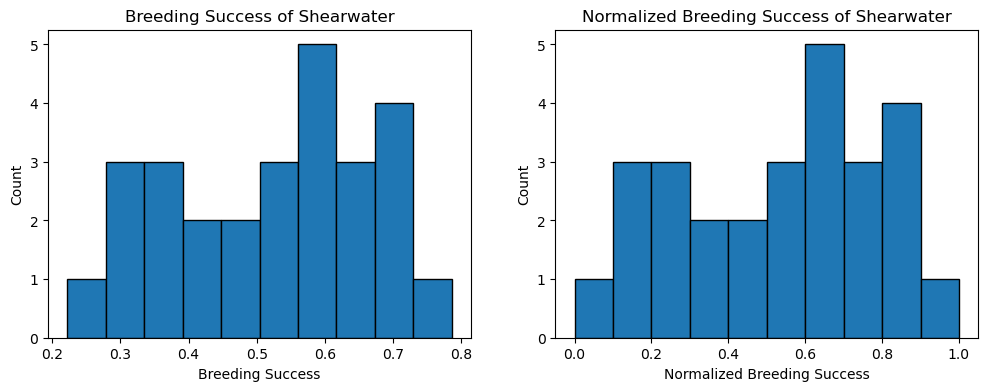

In [48]:
###Normalize shearwater breeding successes
#calculate minum and maximum
min1 = bird_combined['bs_shearwater'].min()
max1 = bird_combined['bs_shearwater'].max()

#normalize the breeding success for shearwaters
bird_combined['bs_shearwater_norm'] = (bird_combined['bs_shearwater'] - min1) / (max1 - min1)

#look at histogram of normalized data
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

ax[0].hist(bird_combined['bs_shearwater'], bins = 10, edgecolor = 'k', lw = 1)
ax[0].set(xlabel = 'Breeding Success', ylabel = 'Count',
          title = 'Breeding Success of Shearwater')

ax[1].hist(bird_combined['bs_shearwater_norm'], bins = 10, edgecolor = 'k', lw = 1)
ax[1].set(xlabel = 'Normalized Breeding Success', ylabel = 'Count',
          title = 'Normalized Breeding Success of Shearwater')

Notice that the distribution doesn't change but the values on the x-axis shift from 0-1. You can also easily normalize the data in one line too.

In [51]:
#normalize the breeding success for penguins
bird_combined['bs_penguin_norm'] = (bird_combined['bs_penguin'] - bird_combined['bs_penguin'].min()) / (
    bird_combined['bs_penguin'].max()- bird_combined['bs_penguin'].min())

bird_combined.head()

,Year,bs_penguin,bs_shearwater,ENSO,bs_shearwater_zscore,bs_shearwater_norm,bs_penguin_norm
0,1993,NaN,0.605263,0.1,0.583614,0.679418,NaN
1,1994,2.023256,0.676471,0.1,1.065170,0.805722,0.528155
2,1995,1.983607,0.653061,1.0,0.906859,0.764200,0.499669
3,1996,2.025641,0.319149,-0.9,-1.351293,0.171924,0.529869
4,1997,1.867347,0.638889,-0.5,0.811015,0.739062,0.416141


In [ ]:
#####TASK#####
#plot normalized breeding success as time series for both species in a single plot 

## Linear Regression